#### Steps to do
1. data (prepare and load)
2. build model
3. fitting the model to data (training)
4. making prediction and evaluting a model (interface)
5. saving and loading a model
6. putting it all together

In [60]:
import torch
import numpy as np
from torch import nn # nn contains layers, activation functions, loss functions, and other utilities to define and train neural networks easily.
import matplotlib.pyplot as plt

### Step 1 :- Data (prepare and load)

In [61]:
# creating data using linear regression
# we'll use linear regression formula to make a straight line with known parameters.
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

#### In above code X is the input and y is the output corresponding to each X

#### Splitting data into training and testing

In [62]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]



#### Visualizing data

In [63]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10,7))

    # Ploting train data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Ploting test data in green
    plt.scatter(test_data, test_labels, c="green", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot predictions if they exists
        plt.scatter(test_data, predictions, c="red", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

In [64]:
# plot_predictions()

### Building model

In [65]:
# Creating linear regression model class
class LinearRegressionModel(nn.Module):  # almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()  # it calls its parent class nn.Module and It initializes all internal methods of nn.Module.
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # -> torch.Tensor means the function returns a tensor. x is the input data
        return self.weights *  x +  self.bias     # linear regression formula

#### checking the content of our pytorch model
we can check our model or what inside the model by `.parameters()`

In [66]:
# Creating a random seed
torch.manual_seed(42)

# Creating an instance of the model
model_0 = LinearRegressionModel()

# Checking the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Making prediction using `torch.inference_mode()`
#### To check our model's preditive power, let's see how well it predicts `y_test` based on `X_test`.
#### When we pass data through our model, it's going to run it though the `forward()` method

In [95]:
# Making predictions with model
with torch.inference_mode():      #inference_mode remove all the default settings like tracking grad, this helps in  faster computation
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

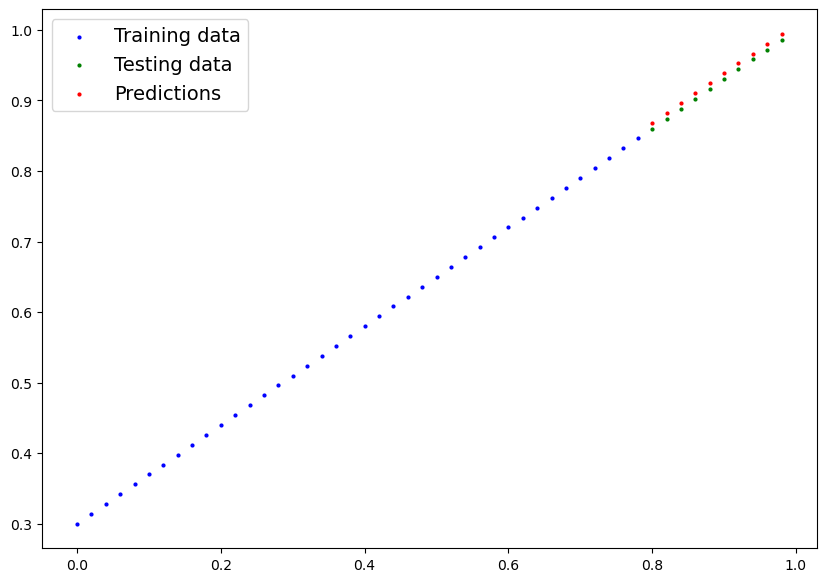

In [96]:
plot_predictions(predictions=y_preds)

### Training 
* one way to measure how poor or how wrong our model prediction are loss function.
* `optimizer` -> It helps minimize the loss function by adjusting the model’s weights and bias.

In [69]:
# Setup  a loss function
loss_fn = nn.L1Loss()   # this is MSE

# Setup a optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)  # lr = learning rate -> possiblu the most important hyperparameter you can set


### Training loop
0. Loop through the data
1. Forward propagation.
2. calculate the loss (compare forward pass predictions to ground truth labels).
3. optimizer zero grad.
4. loss backward. (back propagation)
5. optimizer step -> use the optimizer to adjust our model's parameters to try and improve the loss.

In [70]:
# 
epochs = 200

# tracking values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()  # train mode ini pytorch sets all the parameters that require gradients to require gradients

    # forward pass
    y_pred = model_0(X_train)

    # calculate the loss
    loss = loss_fn(y_pred, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # step the optimizer (perform gradient descent)
    optimizer.step()
    

    model_0.eval()   # turn off different settings in the model not needed for evaluation.
    with torch.inference_mode():# turn off gradient tracking   # or we can use torch.no_grad() but inference_mode is better.
        # forward pass
        test_pred = model_0(X_test)

        # calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}")
        

epoch: 0 | loss: 0.31288138031959534 | test loss: 0.48106518387794495
epoch: 10 | loss: 0.1976713240146637 | test loss: 0.3463551998138428
epoch: 20 | loss: 0.08908725529909134 | test loss: 0.21729660034179688
epoch: 30 | loss: 0.053148526698350906 | test loss: 0.14464017748832703
epoch: 40 | loss: 0.04543796554207802 | test loss: 0.11360953003168106
epoch: 50 | loss: 0.04167863354086876 | test loss: 0.09919948130846024
epoch: 60 | loss: 0.03818932920694351 | test loss: 0.08886633068323135
epoch: 70 | loss: 0.03476089984178543 | test loss: 0.0805937647819519
epoch: 80 | loss: 0.03132382780313492 | test loss: 0.07232122868299484
epoch: 90 | loss: 0.02788739837706089 | test loss: 0.06473556160926819
epoch: 100 | loss: 0.024458957836031914 | test loss: 0.05646304413676262
epoch: 110 | loss: 0.021020207554101944 | test loss: 0.04819049686193466
epoch: 120 | loss: 0.01758546568453312 | test loss: 0.04060482233762741
epoch: 130 | loss: 0.014155393466353416 | test loss: 0.03233227878808975
ep

In [71]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

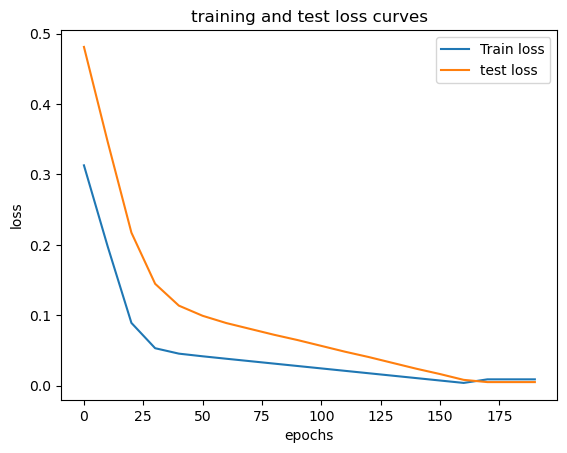

In [75]:
# plot the loss curves

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

In [73]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

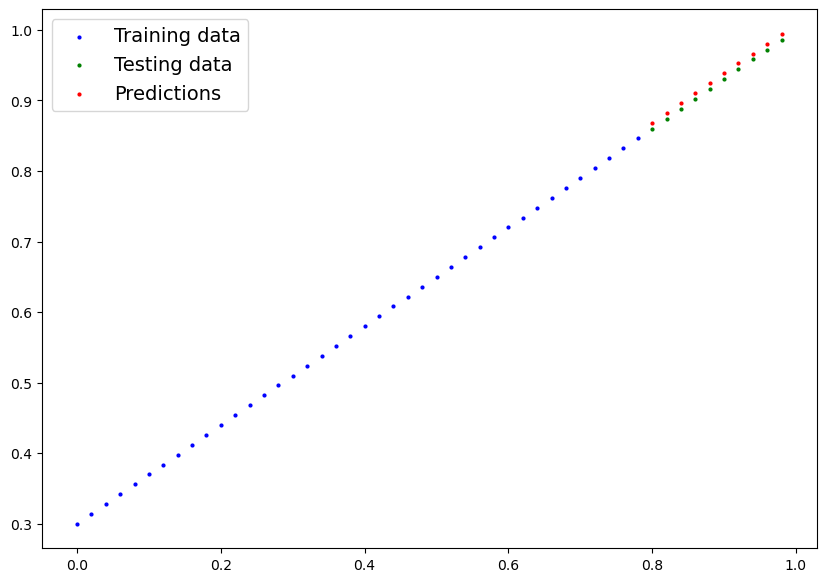

In [88]:
plot_predictions(predictions=y_preds_new)

In [49]:
weight, bias

(0.7, 0.3)

## Saving & Loading model in PyTorch
#### We have 3 method to save and load
1. `torch.save()` -> This allow to save PyTorch object in python pickle format.
2. `torch.load()` -> Allow us to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` -> This allows to load a model's saved state dictionary.

In [82]:
# saving our pytorch model
from pathlib import Path

# creating model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# creating model save path
MODEL_NAME = "model_01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

### Loading model
#### Since we saved our model's state_dict() rather than the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.


In [89]:
# to load a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Loading saved state_dict() of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [92]:
# Making some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [97]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting all together

In [98]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Checking torch version
torch.__version__

'2.3.1.post100'

In [105]:
# Divice agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [108]:
# Create data using linear regression
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [111]:
# Data split
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]

# test split
X_test = X[train_split:]
y_test = y[train_split:]

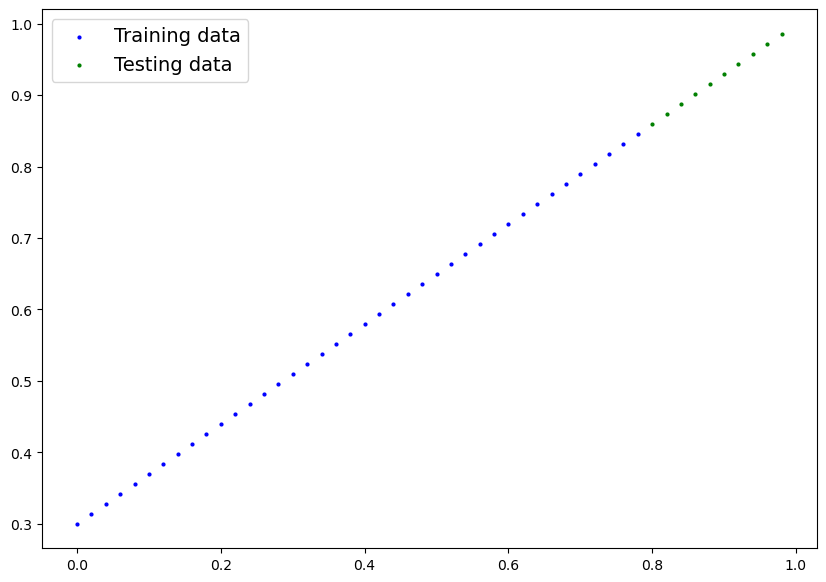

In [112]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)